Importing Libraries to assist in creation of dataFrame for data, creation of K-fold cross validation, standardization of values in dataframe, and logistic regression model.

In [2]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

Creating Dataframe as `dataFrame`

In [4]:
dataFrame = pd.read_csv('FRAFirm.csv')
dataFrame.head()

,FIRM,class,Start,End,Length,Night,Gap,WS,idx,Base,...,Trans,Press,p1s,p1l,p2s,p2l,MalAdj,NFZ,AFZ,MFZ
0,-10,0,290,610,320,0,999,0,6,5.0,...,-4.0,-4.67,0,0,0,0,0,0,0,0
1,-10,0,905,1265,360,0,295,0,6,5.0,...,-4.0,-4.67,-10,320,0,0,0,0,0,0
2,5,0,1040,1505,465,0,999,1,1,5.0,...,0.0,0.00,-10,360,-10,320,0,0,0,0
3,4,0,920,1295,375,0,855,0,2,5.0,...,0.0,-0.67,5,465,-10,360,0,0,0,0
4,1,0,1280,1775,495,1,999,1,1,2.0,...,-1.0,0.00,4,375,5,465,0,0,0,0


Creating a K Fold Cross Validation as `kfold`

In [6]:
kfold = KFold(n_splits = 10, shuffle = True, random_state=42)
model = LogisticRegression(max_iter=300, multi_class='multinomial', solver='lbfgs')

Creating a standard scalar for the training data and test data. In this scalar we are creating a range from 0 to 1 to create minimal standard deviations of the features and preserve zero entries in sparse data. 

This will help with features such as NFZ, AFZ, and MFZ.

In [8]:
scaler = preprocessing.MinMaxScaler()

Seperating column `class` from the dataset to create the `y` series for testing

In [10]:
y = dataFrame['class']
X = dataFrame[[col for col in dataFrame.columns if col != 'class']]

Testing the `scaler` to ensure that the values are in the correct range. 

In [12]:
X_test_minmax = scaler.fit_transform(X)
X_test_minmax_dataframe = pd.DataFrame(X_test_minmax)
X_test_minmax_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.000000,0.201529,0.146,0.067579,0.0,1.000000,0.0,0.161290,1.0,0.458333,...,0.809524,0.894654,0.666667,0.000000,0.666667,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.628909,0.408,0.101796,0.0,0.295295,0.0,0.161290,1.0,0.458333,...,0.809524,0.894654,0.000000,0.226950,0.666667,0.000000,0.0,0.0,0.0,0.0
2,1.000000,0.722724,0.504,0.191617,0.0,1.000000,1.0,0.000000,1.0,1.000000,...,1.000000,1.000000,0.000000,0.255319,0.000000,0.226950,0.0,0.0,0.0,0.0
3,0.933333,0.639333,0.420,0.114628,0.0,0.855856,0.0,0.032258,1.0,1.000000,...,1.000000,0.984886,1.000000,0.329787,0.000000,0.255319,0.0,0.0,0.0,0.0
4,0.733333,0.889507,0.612,0.217280,1.0,1.000000,1.0,0.000000,0.0,1.000000,...,0.952381,1.000000,0.933333,0.265957,1.000000,0.329787,0.0,0.0,0.0,0.0


Create the K number of Folds and start cross validation to find coefficients for dataset. During this applying scaler fit_transform to set range from 0 to 1.

In [14]:
all_y_pred = []
all_y_test = []
accuracy_scores = []

In [15]:
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_minmax = pd.DataFrame(scaler.fit_transform(X_train)) 
    X_test_minmax = pd.DataFrame(scaler.transform(X_test))
    
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_test_minmax)

    all_y_pred.extend(y_pred)
    all_y_test.extend(y_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

print(accuracy_scores)

[0.9458204334365325, 0.9494324045407637, 0.9432404540763674, 0.9489164086687306, 0.9409184726522187, 0.9378224974200207, 0.9437564499484005, 0.9447884416924665, 0.9419504643962848, 0.9478709677419355]


In [16]:
average_accuracy = np.mean(accuracy_scores)
print(f'Average Accuracy: {average_accuracy:.2f}')

Average Accuracy: 0.94


Graphing on this data, creating ROC Curves, Confusion Matrices, 

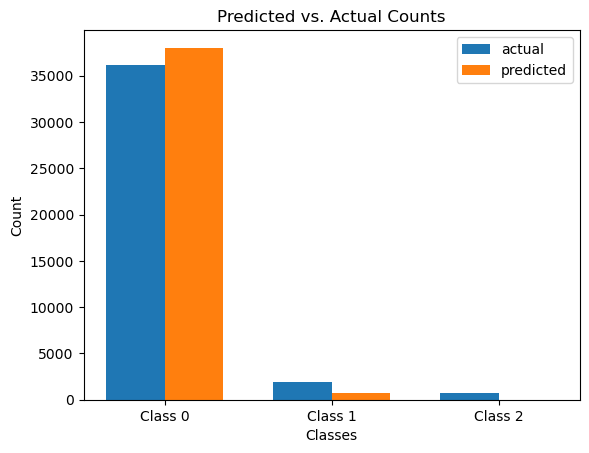

In [18]:
unique, counts_pred = np.unique(all_y_pred, return_counts=True)
unique, counts_actual = np.unique(all_y_test, return_counts=True)

labels = ['Class 0', 'Class 1', 'Class 2']
x = np.arange(len(labels)) 

width = 0.35 
fig, ax = plt.subplots()
bar1 = ax.bar(x- width/2, counts_actual, width, label="actual")
bar2 =ax.bar(x + width/2, counts_pred, width, label="predicted")

ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Predicted vs. Actual Counts')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

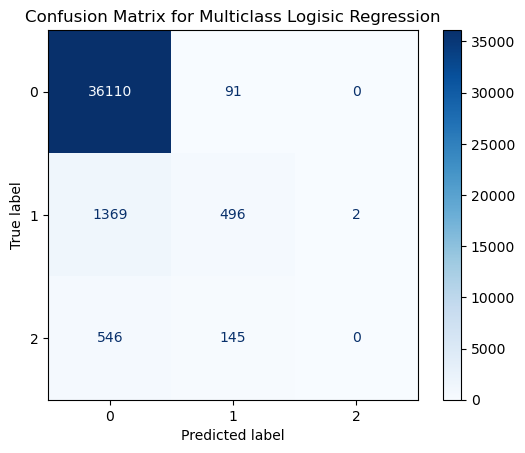

In [19]:
confusion = confusion_matrix(all_y_test, all_y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Multiclass Logisic Regression")
plt.show()

Per the confusion matrix, it is seen that this model is not predicting the 2 label as confidently as the 0 label. This shows an aspect of bias in the data to the label 0. Next test will sample an equal amount of 0,1,2 samples at random and create a model based on that information.

In [21]:
counts = dataFrame['class'].value_counts()
print(counts)

class
0    36201
1     1867
2      691
Name: count, dtype: int64


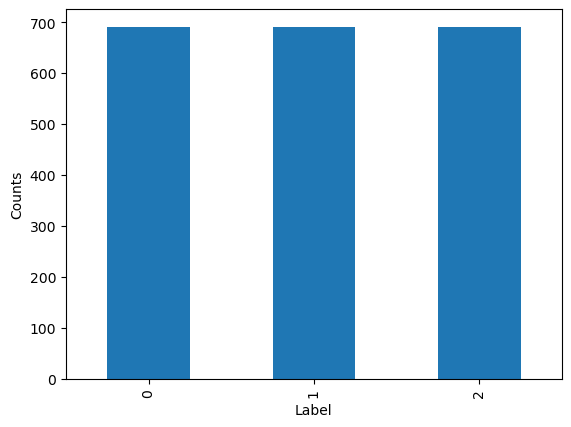

In [22]:
shuffled_dataFrame = dataFrame.sample(frac=1, random_state = 4)

zero_df = shuffled_dataFrame.loc[shuffled_dataFrame['class']==0].sample(n= 691, random_state=42)
one_df = shuffled_dataFrame.loc[shuffled_dataFrame['class']==1].sample(n= 691, random_state=42)
two_df = shuffled_dataFrame.loc[shuffled_dataFrame['class']==2]

normalized_df = pd.concat([zero_df,one_df,two_df])

counts = normalized_df['class'].value_counts().sort_index()
counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Counts')
plt.show()


Now that all the samples of 0 are undersampled we can attempt to recalcuate the model.

In [24]:
y_testTwo = normalized_df['class']
X_testTwo = normalized_df[[col for col in normalized_df.columns if col != 'class']]
all_y_pred_testTwo = []
all_y_test_testTwo = []
accuracy_scores_testTwo = []

In [25]:
for train_index, test_index in kfold.split(X_testTwo):
    X_train, X_test = X_testTwo.iloc[train_index], X_testTwo.iloc[test_index]
    y_train, y_test = y_testTwo.iloc[train_index], y_testTwo.iloc[test_index]

    X_train_minmax = pd.DataFrame(scaler.fit_transform(X_train)) 
    X_test_minmax = pd.DataFrame(scaler.transform(X_test))
    
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_test_minmax)

    all_y_pred_testTwo.extend(y_pred)
    all_y_test_testTwo .extend(y_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_testTwo.append(accuracy)

print(accuracy_scores_testTwo)
average_accuracy = np.mean(accuracy_scores_testTwo)
print(f'Average Accuracy: {average_accuracy:.2f}')

[0.5144230769230769, 0.5240384615384616, 0.5336538461538461, 0.47342995169082125, 0.43478260869565216, 0.5314009661835749, 0.5120772946859904, 0.5410628019323671, 0.4106280193236715, 0.4975845410628019]
Average Accuracy: 0.50


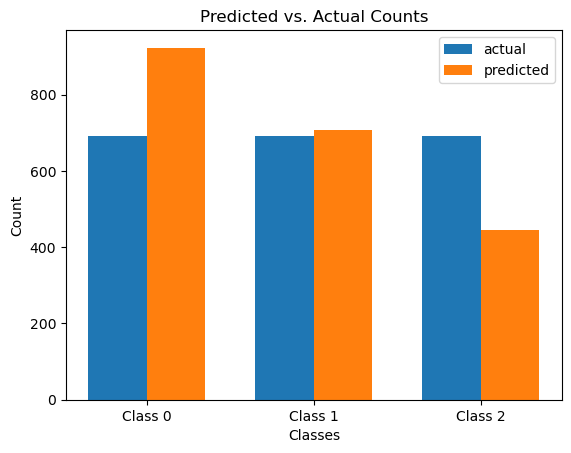

In [26]:
unique, counts_pred = np.unique(all_y_pred_testTwo, return_counts=True)
unique, counts_actual = np.unique(all_y_test_testTwo, return_counts=True)

labels = ['Class 0', 'Class 1', 'Class 2']
x = np.arange(len(labels)) 

width = 0.35 
fig, ax = plt.subplots()
bar1 = ax.bar(x- width/2, counts_actual, width, label="actual")
bar2 =ax.bar(x + width/2, counts_pred, width, label="predicted")

ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Predicted vs. Actual Counts')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

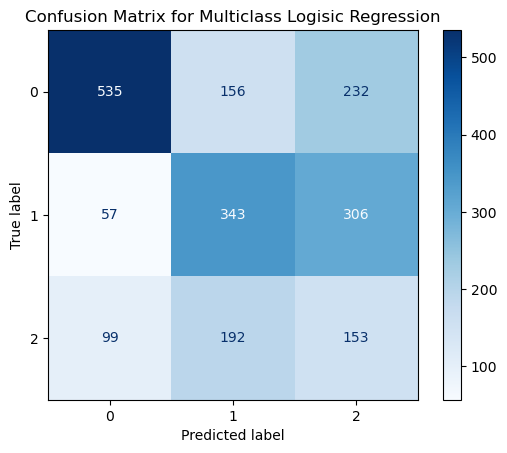

In [27]:
confusion = confusion_matrix(all_y_pred_testTwo, all_y_test_testTwo)

disp = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Multiclass Logisic Regression")
plt.show()

As it can be seen with the accuracy calculation on the scaled data of the undersampling case there has been a significant drop in accuracy from 94% average to 50% average. 
The new model is able to predict class 2 samples better but the new issue is that the model is predicting class 1 samples as class 2 and vice versa. 
I've realized that there might now be a difference between the two labels of class 1 and class 2
I plan to now drop the column 'FIRM' to see if that value has any affect towards to prediction.

In [29]:
y_testTwo = normalized_df['class']
X_testTwo = normalized_df[[col for col in normalized_df.columns if col != 'class']].copy()
X_testTwo.drop('FIRM', axis=1, inplace=True)
all_y_pred_testTwo = []
all_y_test_testTwo = []
accuracy_scores_testTwo = []

In [30]:
for train_index, test_index in kfold.split(X_testTwo):
    X_train, X_test = X_testTwo.iloc[train_index], X_testTwo.iloc[test_index]
    y_train, y_test = y_testTwo.iloc[train_index], y_testTwo.iloc[test_index]

    X_train_minmax = pd.DataFrame(scaler.fit_transform(X_train)) 
    X_test_minmax = pd.DataFrame(scaler.transform(X_test))
    
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_test_minmax)

    all_y_pred_testTwo.extend(y_pred)
    all_y_test_testTwo .extend(y_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_testTwo.append(accuracy)

print(accuracy_scores_testTwo)
average_accuracy = np.mean(accuracy_scores_testTwo)
print(f'Average Accuracy: {average_accuracy:.2f}')

[0.5096153846153846, 0.5288461538461539, 0.5240384615384616, 0.47342995169082125, 0.42995169082125606, 0.5072463768115942, 0.5072463768115942, 0.5555555555555556, 0.42028985507246375, 0.4782608695652174]
Average Accuracy: 0.49


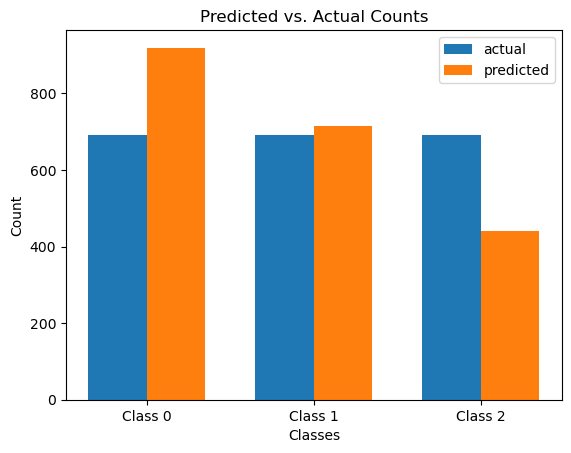

In [31]:
unique, counts_pred = np.unique(all_y_pred_testTwo, return_counts=True)
unique, counts_actual = np.unique(all_y_test_testTwo, return_counts=True)

labels = ['Class 0', 'Class 1', 'Class 2']
x = np.arange(len(labels)) 

width = 0.35 
fig, ax = plt.subplots()
bar1 = ax.bar(x- width/2, counts_actual, width, label="actual")
bar2 =ax.bar(x + width/2, counts_pred, width, label="predicted")

ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Predicted vs. Actual Counts')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

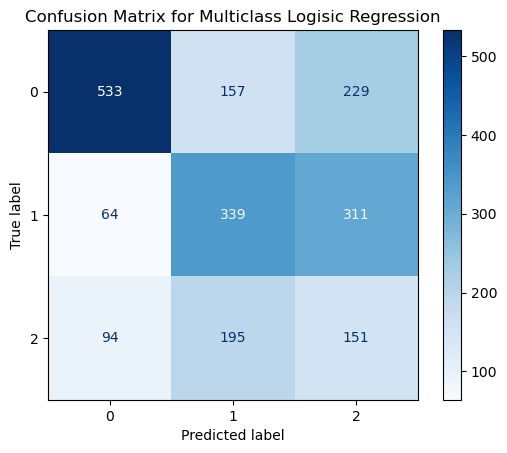

In [32]:
confusion = confusion_matrix(all_y_pred_testTwo, all_y_test_testTwo)

disp = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Multiclass Logisic Regression")
plt.show()

After dropping the column "FIRM" there was no changes in the undersampled version.